In [7]:
%load_ext autoreload
%autoreload 2
import os

import numpy as np
from tifffile import imread

from pasnascope import roi, activity

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Measuring VNC length

To measure the VNC length, we need to go over these steps:

1. Calculate an ROI for each image slice
2. Measure the maximum feret diameter of each slice

> The maximum feret diameter is computed as the longest distance between points around a region's convex hull contour.

The measurement is done using the structural channel, so that the pixel intensity changes less over time, making the ROI easier to calculate.
There is a lot of fluctuation in the lengths, because the embryo flickers over time, causing the VNC to change position and deform.
Part of the change in the VNC length is that the ROI sometimes changes and accounts for regions that are actually part of the brain lobes.

To filter out the effects of movement and deformation, a baseline with a 1 degree polynomial was plotted with the image.

Because we are using the ROI to calculate the VNC length, the more accurate our ROI is, the better the results will be.

In [5]:
base_dir = "/home/cdp58/Documents/repos/pasnascope_analysis/data/embryos/"

# All structural channel movies end with the suffix ch2
filenames = [f for f in sorted(os.listdir(base_dir)) if f.endswith('ch2.tif')]

Initial: 135.49690050585235
Final: 128.73131817431877


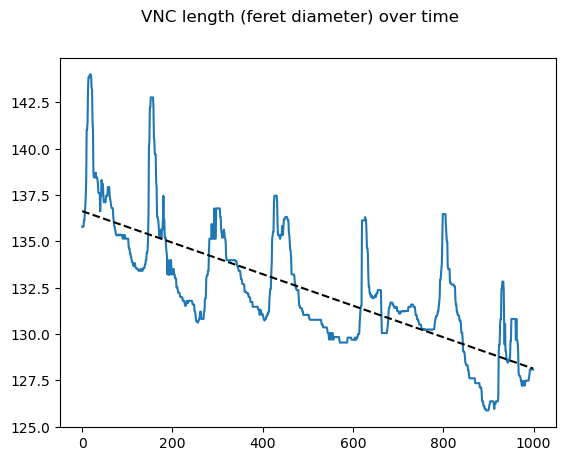

In [8]:
img = imread(base_dir + filenames[0], key=range(0,1000))

img_roi = roi.get_roi(img)
vnc_lengths = activity.measure_VNC(img_roi)

initial_length = np.average(vnc_lengths[:5])
final_length = np.average(vnc_lengths[-5:])

print(f'Initial: {initial_length}')
print(f'Final: {final_length}')

activity.plot_VNC_measures(img_roi)